In [1]:
from nba_api.stats.static import players
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_rows', 10)

# Get all players from nba_api and store in variable
playerList = players.get_players()

In [5]:
# act_df.to_csv("active_players.csv")

In [6]:
#Reading in xlsx file to dataframe
workbook = "2016-2020 Advanced Player Stats.xlsx"
all_dfs = pd.read_excel(workbook, sheet_name = None)

# concatonating all sheets into single DF
ps_df = pd.concat(all_dfs, ignore_index = True)
# dropping NaN columns
ps_df.dropna(axis=1, how = "all")

,Rank (WS),Player,Year,Pos,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Stephen Curry,2016,PG,27,GSW,79,2700,31.5,0.669,...,12.9,32.6,13.8,4.1,17.9,0.318,10.3,1.6,11.9,9.5
1,2,Kevin Durant,2016,SF,27,OKC,72,2578,28.2,0.634,...,13.5,30.6,11.0,3.5,14.5,0.270,8.4,1.6,9.9,7.8
2,3,Russell Westbrook,2016,PG,27,OKC,80,2750,27.6,0.554,...,16.8,31.6,10.0,4.0,14.0,0.245,6.4,1.4,7.8,6.8
3,4,Kawhi Leonard,2016,SF,24,SAS,72,2380,26.0,0.616,...,7.8,25.8,8.3,5.5,13.7,0.277,6.1,3.0,9.1,6.7
4,5,LeBron James,2016,SF,31,CLE,76,2709,27.5,0.588,...,13.2,31.4,9.6,4.0,13.6,0.242,7.0,2.0,9.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,510,Theo Pinson,2020,SG,24,BRK,33,365,5.2,0.370,...,16.9,22.4,-1.0,0.5,-0.6,-0.074,-6.9,-0.2,-7.1,-0.5
2542,511,Dwayne Bacon,2020,SG,24,CHO,39,687,6.1,0.419,...,12.2,19.5,-1.2,0.4,-0.8,-0.053,-5.9,-0.9,-6.8,-0.8
2543,512,Dennis Smith Jr.,2020,PG,22,NYK,34,537,7.5,0.399,...,19.8,23.1,-1.3,0.5,-0.9,-0.079,-5.2,-0.9,-6.1,-0.6
2544,513,Jordan Poole,2020,SG,20,GSW,57,1274,7.2,0.454,...,11.8,21.1,-1.6,0.4,-1.2,-0.047,-4.4,-2.2,-6.6,-1.5


In [7]:
merged_ps = pd.merge(act_df3,ps_df,on="Player",how="outer")
merged_ps

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,14.1,12.6,4.2,2.3,6.5,0.155,0.0,0.2,0.2,1.1
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,Malik Newman,NaN,447.0,2020.0,SG,22.0,CLE,1.0,4.0,-11.3,...,25.8,41.5,0.0,0.0,0.0,-0.503,-14.5,-11.3,-25.9,0.0
2582,Jeremy Pargo,NaN,449.0,2020.0,PG,33.0,GSW,3.0,44.0,12.7,...,15.1,25.7,0.0,0.0,0.0,0.011,-2.8,-3.1,-5.9,0.0
2583,Brian Bowen,NaN,471.0,2020.0,SG,21.0,IND,5.0,29.0,-2.0,...,10.0,15.2,-0.1,0.0,-0.1,-0.154,-9.7,-2.1,-11.8,-0.1
2584,Zach Norvell,NaN,490.0,2020.0,SG,22.0,TOT,5.0,41.0,2.6,...,19.4,16.1,-0.1,0.0,-0.1,-0.084,-7.1,-1.2,-8.3,-0.1


In [8]:
clean_active_ps = merged_ps.dropna(how="any")
clean_active_ps

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,14.1,12.6,4.2,2.3,6.5,0.155,0.0,0.2,0.2,1.1
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,Cody Zeller,True,102.0,2020.0,C,27.0,CHO,58.0,1341.0,18.8,...,11.9,20.8,2.4,1.2,3.6,0.129,0.2,-0.8,-0.6,0.5
1603,Ivica Zubac,True,301.0,2017.0,C,19.0,LAL,38.0,609.0,17.0,...,10.4,20.3,0.6,0.5,1.1,0.086,-1.2,-0.6,-1.7,0.0
1604,Ivica Zubac,True,305.0,2018.0,C,20.0,LAL,43.0,410.0,15.3,...,15.3,17.6,0.5,0.5,1.0,0.118,-1.8,-0.3,-2.0,0.0
1605,Ivica Zubac,True,148.0,2019.0,C,21.0,TOT,59.0,1040.0,18.9,...,13.9,20.3,1.9,1.3,3.2,0.148,-0.2,-0.2,-0.5,0.4


In [9]:
#reading in player salary xlsx file

playerSalary = pd.read_excel("Player_Salary.xlsx")
playerSalary2 = playerSalary.rename(columns={"NAME":"Player"})
playerSalary2.head()

,RK,Player,Position,TEAM,SALARY
0,1,Stephen Curry,PG,Golden State Warriors,40231758
1,2,Chris Paul,PG,Oklahoma City Thunder,38506482
2,3,Russell Westbrook,PG,Houston Rockets,38506482
3,4,John Wall,PG,Washington Wizards,38199000
4,5,Kevin Durant,SF,Brooklyn Nets,38199000


In [10]:
#Merging player salary with active player dataframe
APS = pd.merge(clean_active_ps,playerSalary2,on="Player",how="outer")
ActivePlayerStats = APS.dropna(how = "any")
ActivePlayerStats

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,WS,WS/48,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,6.5,0.155,0.0,0.2,0.2,1.1,41.0,C,Oklahoma City Thunder,25842697.0
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,6.5,0.130,-0.2,0.0,-0.2,1.1,41.0,C,Oklahoma City Thunder,25842697.0
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,9.7,0.187,1.7,-0.6,1.1,2.0,41.0,C,Oklahoma City Thunder,25842697.0
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,9.1,0.163,0.7,0.4,1.1,2.1,41.0,C,Oklahoma City Thunder,25842697.0
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,6.2,0.190,2.1,1.1,3.2,2.0,41.0,C,Oklahoma City Thunder,25842697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,Cody Zeller,True,102.0,2020.0,C,27.0,CHO,58.0,1341.0,18.8,...,3.6,0.129,0.2,-0.8,-0.6,0.5,88.0,C,Charlotte Hornets,14471910.0
1559,Ivica Zubac,True,301.0,2017.0,C,19.0,LAL,38.0,609.0,17.0,...,1.1,0.086,-1.2,-0.6,-1.7,0.0,181.0,C,LA Clippers,6481482.0
1560,Ivica Zubac,True,305.0,2018.0,C,20.0,LAL,43.0,410.0,15.3,...,1.0,0.118,-1.8,-0.3,-2.0,0.0,181.0,C,LA Clippers,6481482.0
1561,Ivica Zubac,True,148.0,2019.0,C,21.0,TOT,59.0,1040.0,18.9,...,3.2,0.148,-0.2,-0.2,-0.5,0.4,181.0,C,LA Clippers,6481482.0


In [11]:
#Filter for players who played less than 1600 minutes but more than 1400 minutes
bp1 = ActivePlayerStats.loc[(ActivePlayerStats["MP"]<1600)&(ActivePlayerStats["MP"]>1400)]
bp1

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,WS,WS/48,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,6.2,0.190,2.1,1.1,3.2,2.0,41.0,C,Oklahoma City Thunder,25842697.0
16,Jarrett Allen,True,104.0,2018.0,C,19.0,BRK,72.0,1441.0,17.5,...,4.2,0.141,-0.9,0.1,-0.8,0.5,303.0,C,Brooklyn Nets,2376840.0
55,OG Anunoby,True,166.0,2018.0,SF,20.0,TOR,74.0,1481.0,10.0,...,3.0,0.098,-1.2,0.6,-0.6,0.5,311.0,SF,Toronto Raptors,2281800.0
65,Trevor Ariza,True,161.0,2020.0,SF,34.0,TOT,53.0,1493.0,11.0,...,2.6,0.084,-1.5,0.9,-0.5,0.6,110.0,SF,Sacramento Kings,12195122.0
67,D.J. Augustin,True,282.0,2017.0,PG,29.0,ORL,78.0,1538.0,11.0,...,1.2,0.038,-1.2,-1.8,-3.0,-0.4,170.0,PG,Orlando Magic,7250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,John Wall,True,188.0,2018.0,PG,27.0,WAS,41.0,1410.0,19.1,...,2.7,0.092,3.5,-0.5,3.0,1.8,4.0,PG,Washington Wizards,38199000.0
1502,Derrick White,True,119.0,2020.0,SG,25.0,SAS,61.0,1468.0,15.9,...,3.4,0.110,0.7,0.2,0.9,1.1,335.0,PG,San Antonio Spurs,1948080.0
1544,Delon Wright,True,96.0,2018.0,PG,25.0,TOR,69.0,1433.0,16.5,...,4.5,0.152,1.4,1.8,3.3,1.9,136.0,PG,Dallas Mavericks,9473684.0
1546,Delon Wright,True,73.0,2020.0,SG,27.0,DAL,65.0,1412.0,16.1,...,4.3,0.148,0.4,2.0,2.4,1.6,136.0,PG,Dallas Mavericks,9473684.0


In [12]:
#identify bench players
bp_a = bp1.groupby(["Position", "Player"]).agg({'WS':"mean"})
bp_b = bp_a['WS'].groupby(level=0, group_keys=False)
bp_c = bp_b.apply(lambda x: x.sort_values(ascending=False))
bp_d = pd.DataFrame(bp_c.groupby("Position").head(1)).reset_index()
bp_f = bp_d.loc[bp_d["Position"]!=" G",:].reset_index()
bp_g = bp_f.rename(columns={"Player":"Bench_Player","WS":"Bench_WS"})
bp_h = bp_g.drop(columns=["index"])
bp_h

,Position,Bench_Player,Bench_WS
0,C,Mitchell Robinson,6.8
1,PF,Kevon Looney,6.0
2,PG,George Hill,5.9
3,SF,Gordon Hayward,5.0
4,SG,Fred VanVleet,4.7


In [13]:
#identify starting players
sp_a = ActivePlayerStats.groupby(["Position", "Player"]).agg({'WS':"mean"})
sp_b = sp_a['WS'].groupby(level=0, group_keys=False)
sp_c = sp_b.apply(lambda x: x.sort_values(ascending=False))
sp_d = pd.DataFrame(sp_c)
sp_e = sp_d.groupby("Position").head(1).reset_index()
sp_f = sp_e.loc[(sp_e["Position"]!=" G")&(sp_e["Position"]!=" F"),:].reset_index()
sp_g = sp_f.rename(columns={"Player":"Starting_Player","WS":"Starting_WS"})
sp_h = sp_g.drop(columns=["index"])
sp_h

,Position,Starting_Player,Starting_WS
0,C,Rudy Gobert,10.64
1,PF,Giannis Antetokounmpo,11.24
2,PG,Damian Lillard,10.78
3,SF,Kevin Durant,12.10
4,SG,James Harden,14.08


In [14]:
#creating the league winning roster (LWR)
LWR = pd.merge(sp_h, bp_h,on="Position",how = "outer")
LWR

,Position,Starting_Player,Starting_WS,Bench_Player,Bench_WS
0,C,Rudy Gobert,10.64,Mitchell Robinson,6.8
1,PF,Giannis Antetokounmpo,11.24,Kevon Looney,6.0
2,PG,Damian Lillard,10.78,George Hill,5.9
3,SF,Kevin Durant,12.10,Gordon Hayward,5.0
4,SG,James Harden,14.08,Fred VanVleet,4.7


In [15]:
#calculating total salary of LWR
APS2 = ActivePlayerStats.loc[(ActivePlayerStats["Player"]=="Rudy Gobert")|
                (ActivePlayerStats["Player"]=="Giannis Antetokounmpo")|
                (ActivePlayerStats["Player"]=="Damian Lillard")|
                (ActivePlayerStats["Player"]=="Kevin Durant")|
                (ActivePlayerStats["Player"]=="James Harden")|
                (ActivePlayerStats["Player"]=="Mitchell Robinson")|
                (ActivePlayerStats["Player"]=="Kevon Looney")|
                (ActivePlayerStats["Player"]=="George Hill")|
                (ActivePlayerStats["Player"]=="Gordon Hayward")|
                (ActivePlayerStats["Player"]=="Fred VanVleet"),["Player","Year","SALARY"]]
APS3 = pd.DataFrame(APS2.groupby(APS2["Player"])["SALARY"].mean())
APS4 = APS3.append(APS3.sum().rename('Total'))
APS4

,SALARY
Player,
Damian Lillard,29802321.0
Fred VanVleet,9346153.0
George Hill,9133907.0
Giannis Antetokounmpo,25842697.0
Gordon Hayward,32700690.0
...,...
Kevin Durant,38199000.0
Kevon Looney,4464226.0
Mitchell Robinson,1599712.0


In [16]:
# Getting the team by maximal wins, ranked by defensive win shares. 
pd.set_option('display.max_columns', None)

defensive win shares = DWS

In [17]:
#identify starting players ranking with defence
spd_a = ActivePlayerStats.groupby(["Position", "Player"]).agg({'DWS':"mean"})
spd_b = spd_a['DWS'].groupby(level=0, group_keys=False)
spd_c = spd_b.apply(lambda x: x.sort_values(ascending=False))
spd_d = pd.DataFrame(spd_c)
spd_e = spd_d.groupby("Position").head(1).reset_index()
spd_f = spd_e.loc[(sp_e["Position"]!=" G")&(spd_e["Position"]!=" F"),:].reset_index()
spd_g = spd_f.rename(columns={"Player":"Starting_Player","DWS":"Starting_DWS"})
spd_h = spd_g.drop(columns=["index"])
spd_h

,Position,Starting_Player,Starting_DWS
0,C,Andre Drummond,5.20
1,PF,Giannis Antetokounmpo,4.26
2,PG,Russell Westbrook,4.08
3,SF,Kawhi Leonard,3.42
4,SG,Paul George,3.74


In [18]:
#identify starting players ranking with defence
spd_a = ActivePlayerStats.groupby(["Position", "Player"]).agg({'DWS':"mean"})
spd_b = spd_a['DWS'].groupby(level=0, group_keys=False)
spd_c = spd_b.apply(lambda x: x.sort_values(ascending=False))
spd_d = pd.DataFrame(spd_c)
spd_e = spd_d.groupby("Position").head(1).reset_index()
spd_f = spd_e.loc[(sp_e["Position"]!=" G")&(spd_e["Position"]!=" F"),:].reset_index()
spd_g = spd_f.rename(columns={"Player":"Starting_Player","DWS":"Starting_DWS"})
spd_h = spd_g.drop(columns=["index"])
spd_h

,Position,Starting_Player,Starting_DWS
0,C,Andre Drummond,5.20
1,PF,Giannis Antetokounmpo,4.26
2,PG,Russell Westbrook,4.08
3,SF,Kawhi Leonard,3.42
4,SG,Paul George,3.74


In [19]:
LWDS_merged = pd.merge(spd_h,sp_d,left_on="Starting_Player",right_on="Player",how="inner")
LWDS_merged

,Position,Starting_Player,Starting_DWS,WS
0,C,Andre Drummond,5.20,7.74
1,PF,Giannis Antetokounmpo,4.26,11.24
2,PG,Russell Westbrook,4.08,9.66
3,SF,Kawhi Leonard,3.42,9.06
4,SG,Paul George,3.74,8.20


In [20]:
bpd_a = bp1.groupby(["Position", "Player"]).agg({'DWS':"mean"})
bpd_b = bpd_a['DWS'].groupby(level=0, group_keys=False)
bpd_c = bpd_b.apply(lambda x: x.sort_values(ascending=False))
bpd_d = pd.DataFrame(bpd_c.groupby("Position").head(1)).reset_index()
bpd_f = bpd_d.loc[bpd_d["Position"]!=" G",:].reset_index()
bpd_g = bpd_f.rename(columns={"Player":"Bench_Player","DWS":"Bench_DWS"})
bpd_h = bpd_g.drop(columns=["index"])
bpd_h

,Position,Bench_Player,Bench_DWS
0,C,Steven Adams,2.5
1,PF,Kristaps Porzingis,2.6
2,PG,Eric Bledsoe,2.9
3,SF,Thabo Sefolosha,2.7
4,SG,Wesley Matthews,2.4


In [21]:
# psal = ActivePlayerStats[["Player","SALARY"]].drop_duplicates()

In [22]:
PlSal = ActivePlayerStats[["Player", "SALARY"]].drop_duplicates()
PlSal

,Player,SALARY
0,Steven Adams,25842697.0
5,Bam Adebayo,3454080.0
8,LaMarcus Aldridge,26000000.0
13,Nickeil Alexander-Walker,2964840.0
14,Grayson Allen,2429400.0
...,...,...
1542,Delon Wright,9473684.0
1547,Thaddeus Young,12900000.0
1552,Trae Young,6273000.0
1554,Cody Zeller,14471910.0


In [23]:
# LWDS_merged = pd.merge(spd_h,sp_d,left_on="Starting_Player",right_on="Player",how="inner")
LWDS_merged

,Position,Starting_Player,Starting_DWS,WS
0,C,Andre Drummond,5.20,7.74
1,PF,Giannis Antetokounmpo,4.26,11.24
2,PG,Russell Westbrook,4.08,9.66
3,SF,Kawhi Leonard,3.42,9.06
4,SG,Paul George,3.74,8.20


In [24]:
bpd_h

,Position,Bench_Player,Bench_DWS
0,C,Steven Adams,2.5
1,PF,Kristaps Porzingis,2.6
2,PG,Eric Bledsoe,2.9
3,SF,Thabo Sefolosha,2.7
4,SG,Wesley Matthews,2.4


In [25]:
final_defence = pd.merge(LWDS_merged, bpd_h, on = "Position", how = "inner")
final_defence

,Position,Starting_Player,Starting_DWS,WS,Bench_Player,Bench_DWS
0,C,Andre Drummond,5.20,7.74,Steven Adams,2.5
1,PF,Giannis Antetokounmpo,4.26,11.24,Kristaps Porzingis,2.6
2,PG,Russell Westbrook,4.08,9.66,Eric Bledsoe,2.9
3,SF,Kawhi Leonard,3.42,9.06,Thabo Sefolosha,2.7
4,SG,Paul George,3.74,8.20,Wesley Matthews,2.4


In [26]:
FdSal1 = pd.merge(final_defence, PlSal, left_on = "Starting_Player", right_on = "Player", how = 'inner')
FdSal2 = FdSal1.rename(columns={"Player":"Def_Starting_Player2", "SALARY":"Def_Starting_SAL"})
FdSal3 = pd.merge(FdSal2, PlSal, left_on = "Bench_Player", right_on = "Player", how = 'inner')
FdSal4 = FdSal3.rename(columns={"Player":"Def_Bench_Player2", "SALARY":"Def_Bench_SAL"})
FdSal5 = FdSal4.drop(columns=["Def_Starting_Player2","Def_Bench_Player2"])
FdSal5

,Position,Starting_Player,Starting_DWS,WS,Bench_Player,Bench_DWS,Def_Starting_SAL,Def_Bench_SAL
0,C,Andre Drummond,5.20,7.74,Steven Adams,2.5,27093019.0,25842697.0
1,PF,Giannis Antetokounmpo,4.26,11.24,Kristaps Porzingis,2.6,25842697.0,27285000.0
2,PG,Russell Westbrook,4.08,9.66,Eric Bledsoe,2.9,38506482.0,15625000.0
3,SF,Kawhi Leonard,3.42,9.06,Thabo Sefolosha,2.7,32742000.0,1620564.0
4,SG,Paul George,3.74,8.20,Wesley Matthews,2.4,30560700.0,2564753.0


In [27]:
# offpsal_merged = pd.merge(offT,psal,left_on="Offensive_Starting_Player",right_on="Player",how="inner")
# offpsal_merged2 = offpsal_merged.rename(columns={"Player":"Off_Starting_Player2","SALARY":"Off_Starting_SAL"})
# offpsal_merged2

In [28]:
# Adding total win shares to bench player column
x = sp_d.reset_index()
y = pd.merge(bpd_h, x, left_on = "Bench_Player", right_on = "Player", how = 'inner' )

In [29]:
# dropping extra columns
z = y.drop(columns=["Position_y", "Player"])
z

,Position_x,Bench_Player,Bench_DWS,WS
0,C,Steven Adams,2.5,7.60
1,PF,Kristaps Porzingis,2.6,4.30
2,PG,Eric Bledsoe,2.9,5.38
3,SF,Thabo Sefolosha,2.7,2.52
4,SG,Wesley Matthews,2.4,3.04


In [30]:
FdSal5

,Position,Starting_Player,Starting_DWS,WS,Bench_Player,Bench_DWS,Def_Starting_SAL,Def_Bench_SAL
0,C,Andre Drummond,5.20,7.74,Steven Adams,2.5,27093019.0,25842697.0
1,PF,Giannis Antetokounmpo,4.26,11.24,Kristaps Porzingis,2.6,25842697.0,27285000.0
2,PG,Russell Westbrook,4.08,9.66,Eric Bledsoe,2.9,38506482.0,15625000.0
3,SF,Kawhi Leonard,3.42,9.06,Thabo Sefolosha,2.7,32742000.0,1620564.0
4,SG,Paul George,3.74,8.20,Wesley Matthews,2.4,30560700.0,2564753.0


In [31]:
dpsal_a = FdSal5.drop(labels="Starting_Player",axis=1)
dsal_b = dpsal_a.drop(labels="Bench_Player",axis=1)
dsal_b

,Position,Starting_DWS,WS,Bench_DWS,Def_Starting_SAL,Def_Bench_SAL
0,C,5.20,7.74,2.5,27093019.0,25842697.0
1,PF,4.26,11.24,2.6,25842697.0,27285000.0
2,PG,4.08,9.66,2.9,38506482.0,15625000.0
3,SF,3.42,9.06,2.7,32742000.0,1620564.0
4,SG,3.74,8.20,2.4,30560700.0,2564753.0


True


Text(0, 0.5, 'Player Salary')

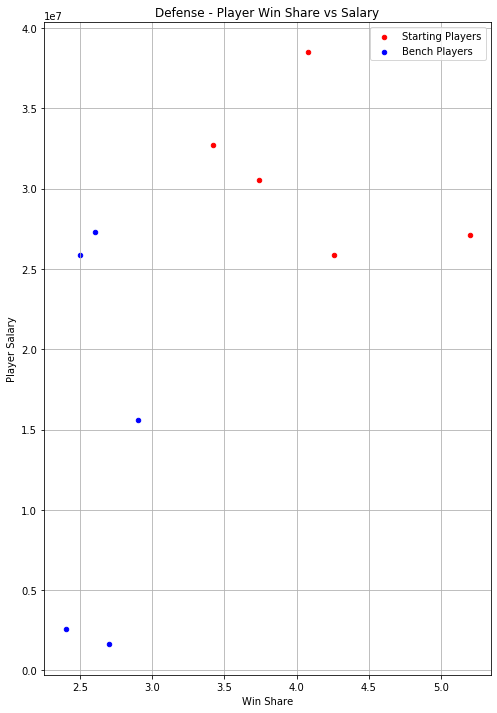

In [35]:
ax1 = dsal_b.plot(kind='scatter', x='Starting_DWS', y='Def_Starting_SAL', c="r", label = "Starting Players", grid = True, figsize= (8,8))
ax2 = dsal_b.plot(kind='scatter', x='Bench_DWS', y='Def_Bench_SAL', c="b",label = "Bench Players", grid = True, figsize= (8,12), ax=ax1)
print(ax1 == ax2)
plt.title("Defense - Player Win Share vs Salary")
plt.xlabel("Win Share")
plt.ylabel("Player Salary in 10 millions")

In [37]:
dsal_b["Combined_Win_Share"] = dsal_b["Starting_DWS"] + dsal_b["Bench_DWS"]
dsal_b["Combined_Salary"] = dsal_b["Def_Starting_SAL"] + dsal_b["Def_Bench_SAL"]
dsal_b

,Position,Starting_DWS,WS,Bench_DWS,Def_Starting_SAL,Def_Bench_SAL,Combined_Win_Share,Combined_Salary
0,C,5.20,7.74,2.5,27093019.0,25842697.0,7.70,52935716.0
1,PF,4.26,11.24,2.6,25842697.0,27285000.0,6.86,53127697.0
2,PG,4.08,9.66,2.9,38506482.0,15625000.0,6.98,54131482.0
3,SF,3.42,9.06,2.7,32742000.0,1620564.0,6.12,34362564.0
4,SG,3.74,8.20,2.4,30560700.0,2564753.0,6.14,33125453.0


Text(0, 0.5, 'Player Salary in 10 millions')

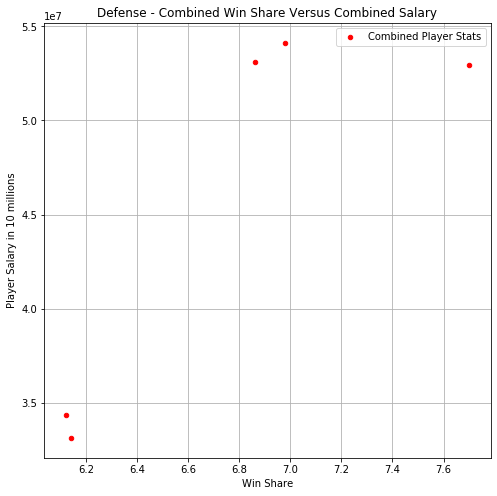

In [39]:
dsal_b.plot(kind='scatter', x='Combined_Win_Share', y='Combined_Salary', c="r", label = "Combined Player Stats", grid = True, figsize= (8,8))
plt.title("Defense - Combined Win Share Versus Combined Salary")
plt.xlabel("Win Share")
plt.ylabel("Player Salary in 10 millions")

Text(0.5, 1.0, 'Defense - Combined Win Share Per Position')

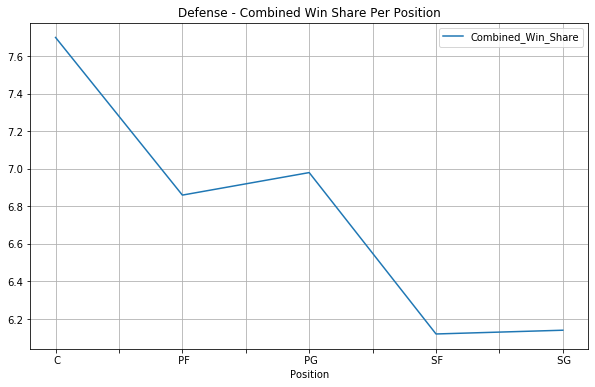

In [41]:
dsal_b.plot.line(x = "Position", y = "Combined_Win_Share",grid = True, figsize= (10,6))
plt.title("Defense - Combined Win Share Per Position")

In [43]:
dsal_c = dsal_b.drop(labels="Starting_DWS",axis=1)
dsal_d = dsal_c.drop(labels="Bench_DWS",axis=1)
dsal_e = dsal_d.drop(labels="Def_Starting_SAL",axis=1)
dsal_f = dsal_e.drop(labels="Def_Bench_SAL",axis=1)
dsal_g = dsal_f.reset_index(drop=True, inplace=False)
dsal_g

,Position,WS,Combined_Win_Share,Combined_Salary
0,C,7.74,7.70,52935716.0
1,PF,11.24,6.86,53127697.0
2,PG,9.66,6.98,54131482.0
3,SF,9.06,6.12,34362564.0
4,SG,8.20,6.14,33125453.0


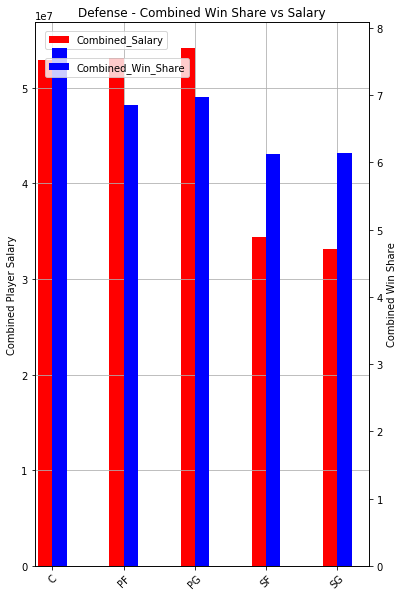

In [46]:
fontsize = 20
t = np.arange(0.0, 6.0, 1)
xticklabels = ['C','PF','PG','SF','SG']
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.2
dsal_g.Combined_Salary.plot(kind='bar', color='red', ax=ax, width=width, position=1,grid = True, figsize= (6,10))
dsal_g.Combined_Win_Share.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.tick_params(axis='both', which='major')
ax.set_xticklabels(xticklabels, rotation = 45)
ax.set_ylabel('Combined Player Salary')
ax2.set_ylabel('Combined Win Share')
ax.legend(loc = (.03,.95), frameon = True)
ax2.legend( loc = (.03, .90), frameon = True)
plt.title("Defense - Combined Win Share vs Salary")
plt.show()